In [15]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")

# Results
import results
reload(results)
print 'Done.'

Done.


In [16]:
Results = results.Results
r = Results('2016_06_28', 7)
r.print_config()

Aim:
See if turning off dropout does anything interesting


IOError: [Errno 2] No such file or directory: '/homes/lm1015/v/data/2016_06_28/007/numerical_data/x_axis.ssv'

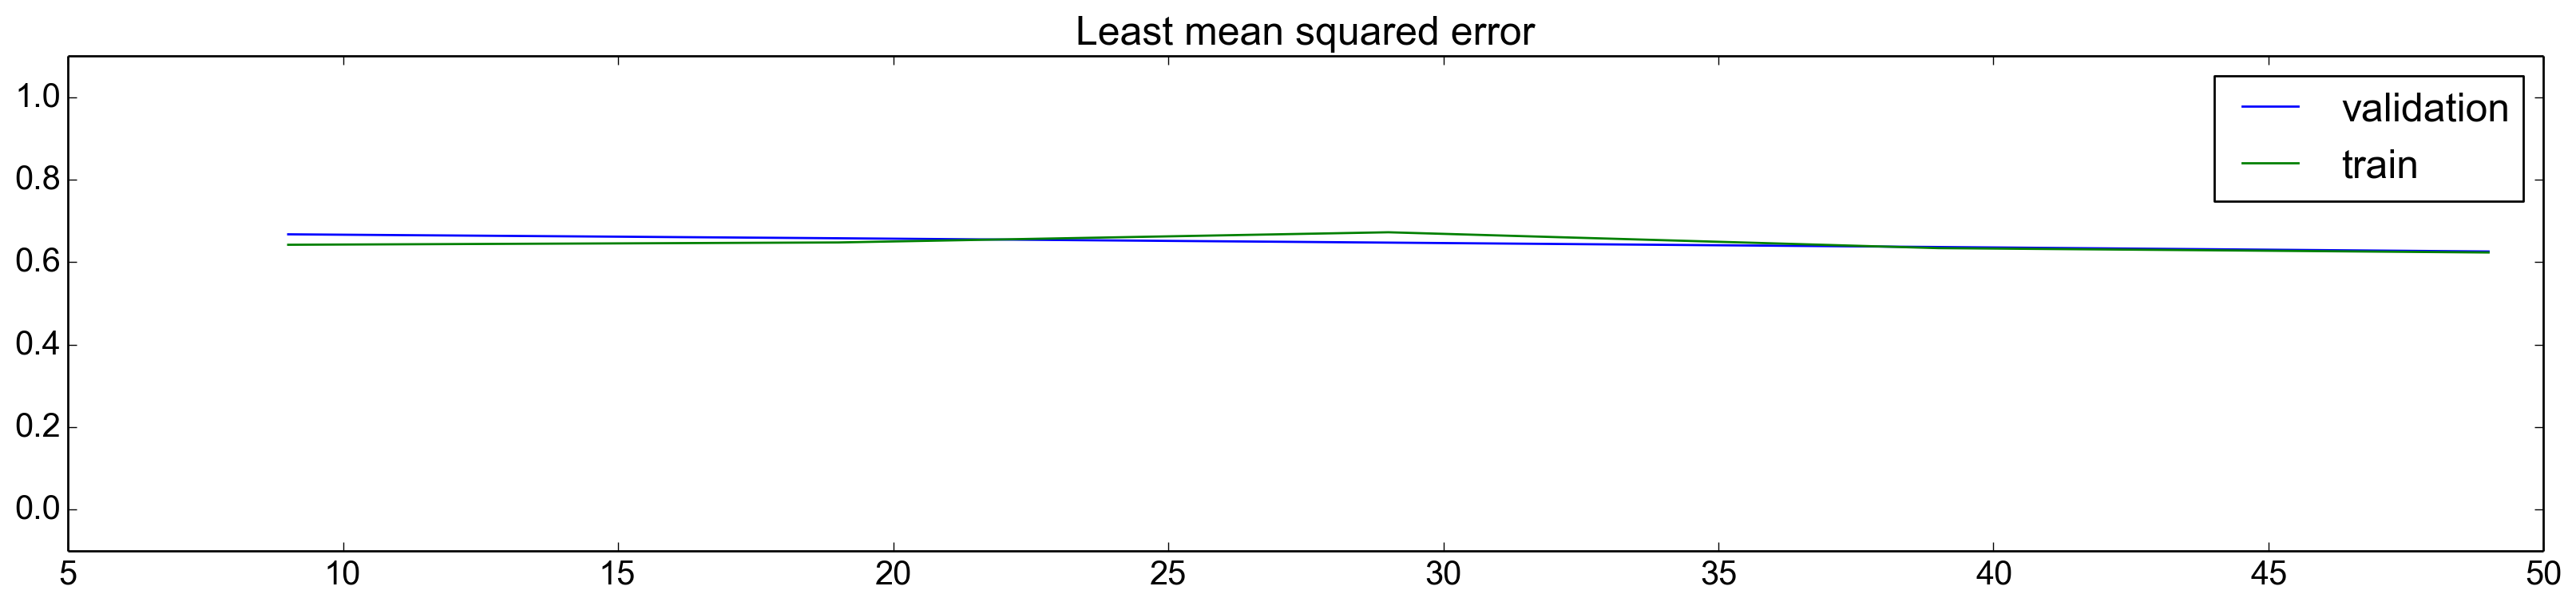

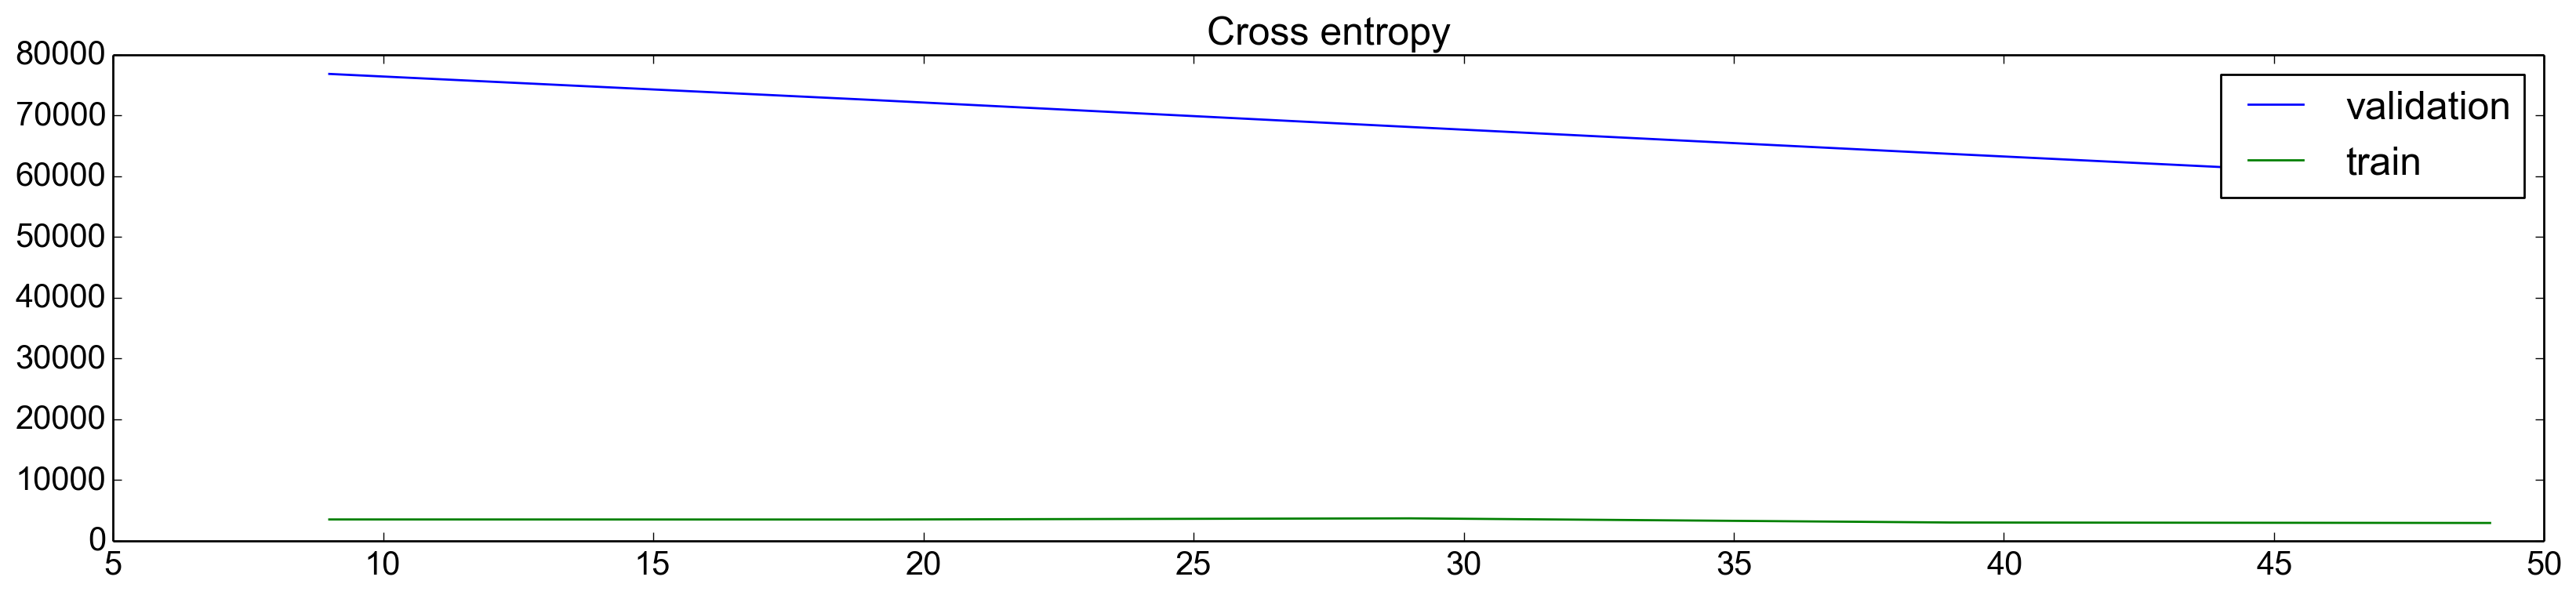

In [3]:
r.lmsq()
r.cross()

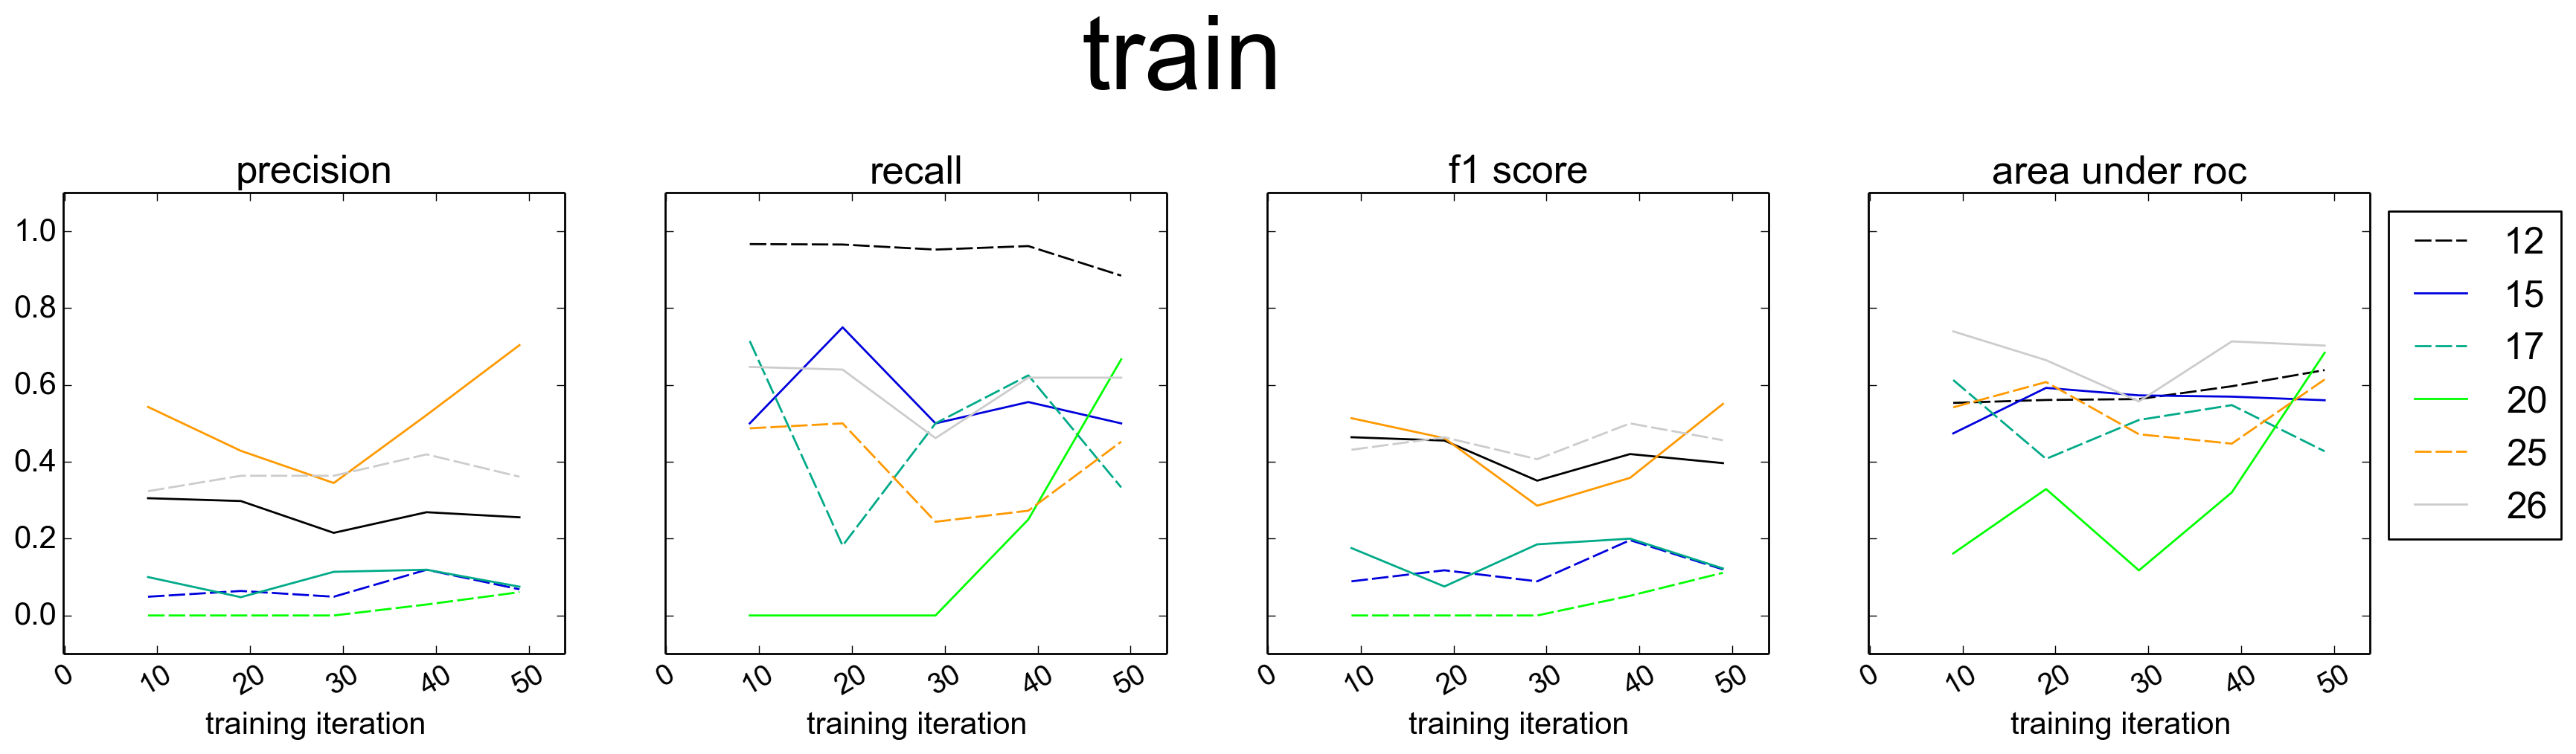

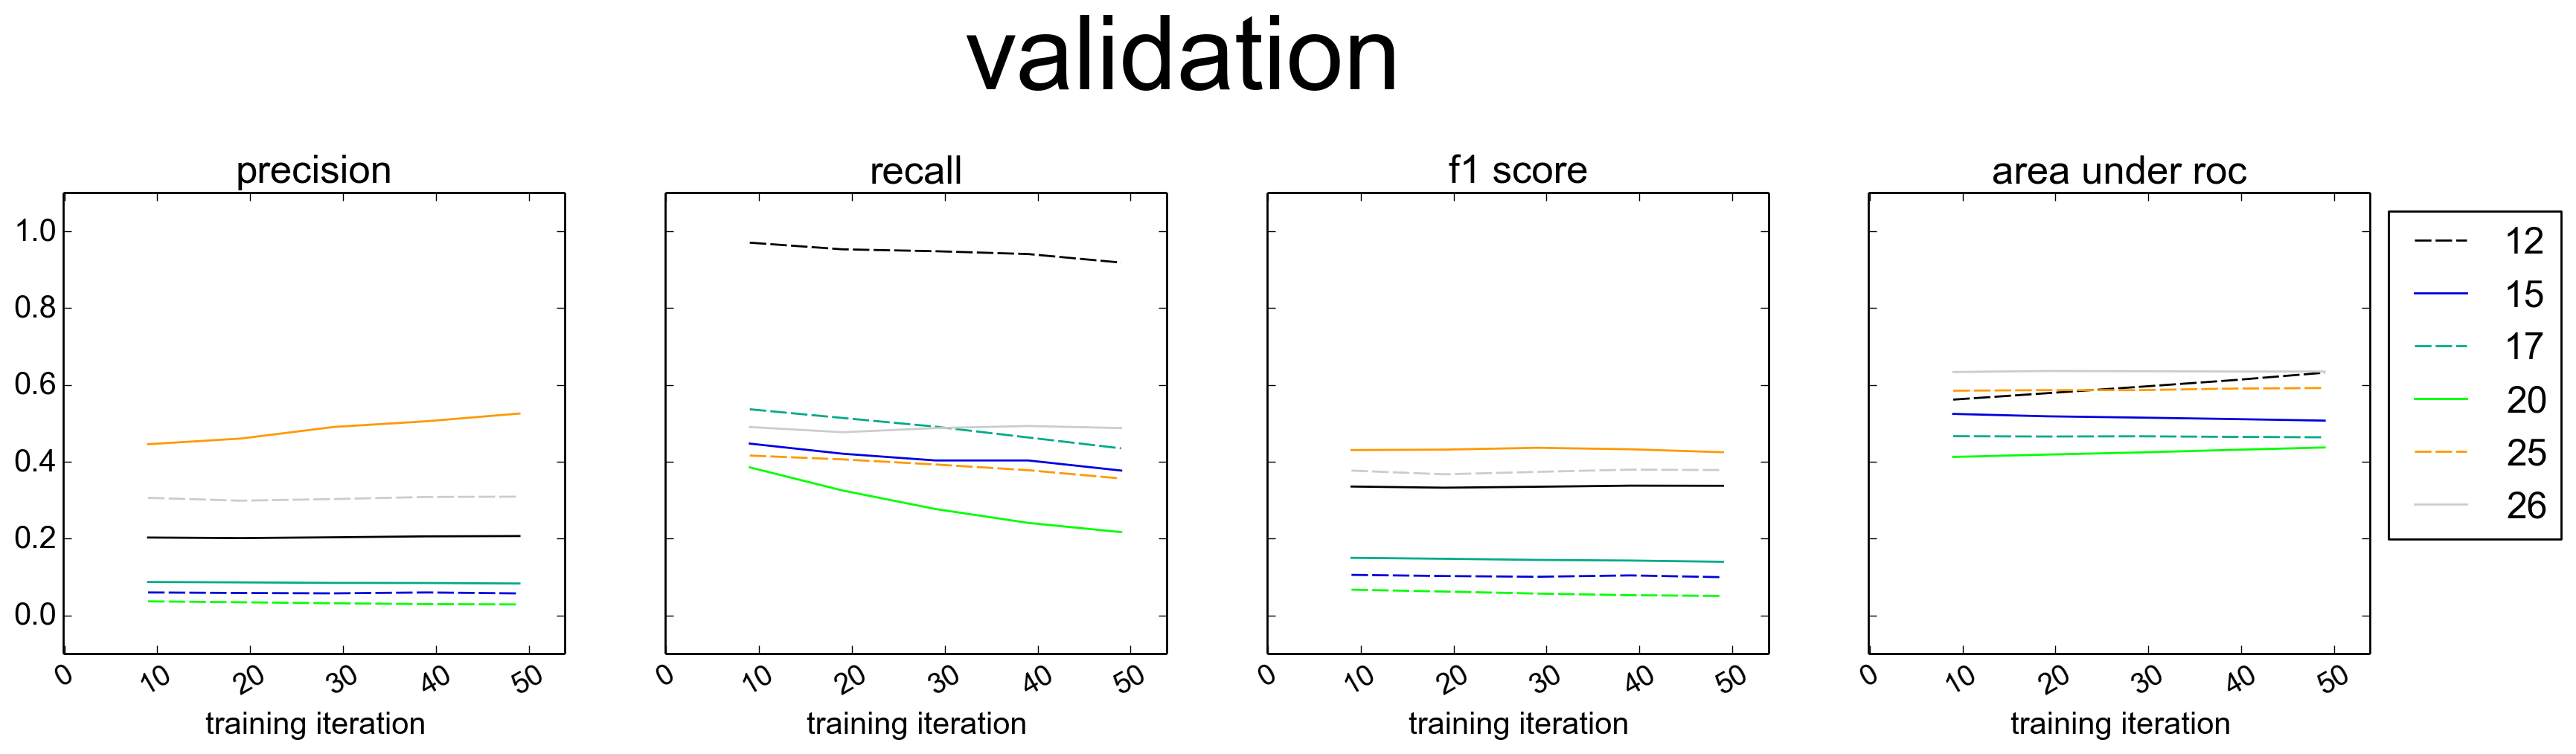

In [4]:
r.au('train',smooth=False)
r.au('validation',smooth=False)

# Test set:

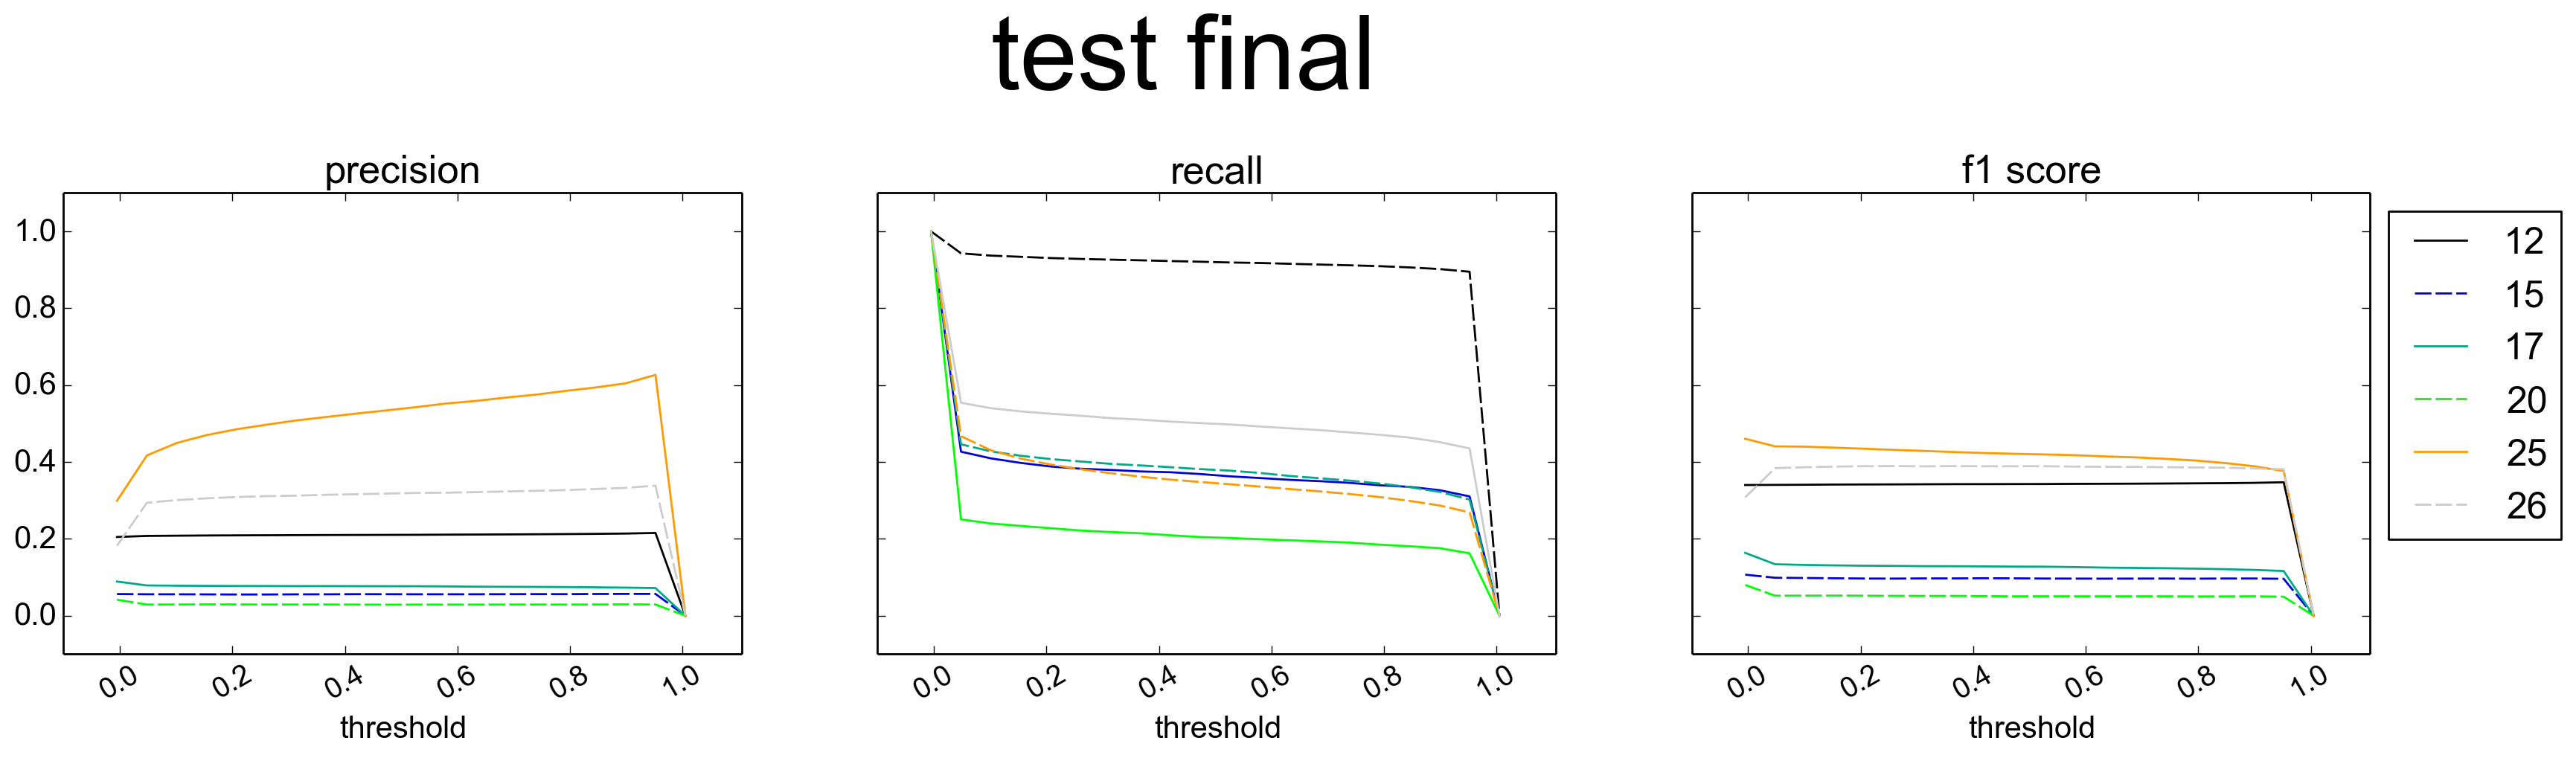

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
12 	0.64 	poor 	0.35 	0.22 	1.0
15 	0.5 	fail 	0.11 	0.06 	1.0
17 	0.45 	fail 	0.16 	0.09 	1.0
20 	0.43 	fail 	0.08 	0.04 	1.0
25 	0.59 	fail 	0.46 	0.63 	1.0
26 	0.65 	poor 	0.39 	0.34 	1.0
average roc =  0.541373106508
best thresholds
au	best roc	best f1		col3-col2
12 	1.0 		0.95 		-0.05
15 	1.0 		-0.01 		-1.01
17 	2.0 		-0.01 		-2.01
20 	2.0 		-0.01 		-2.01
25 	0.58 		-0.01 		-0.59
26 	0.25 		0.26 		0.01


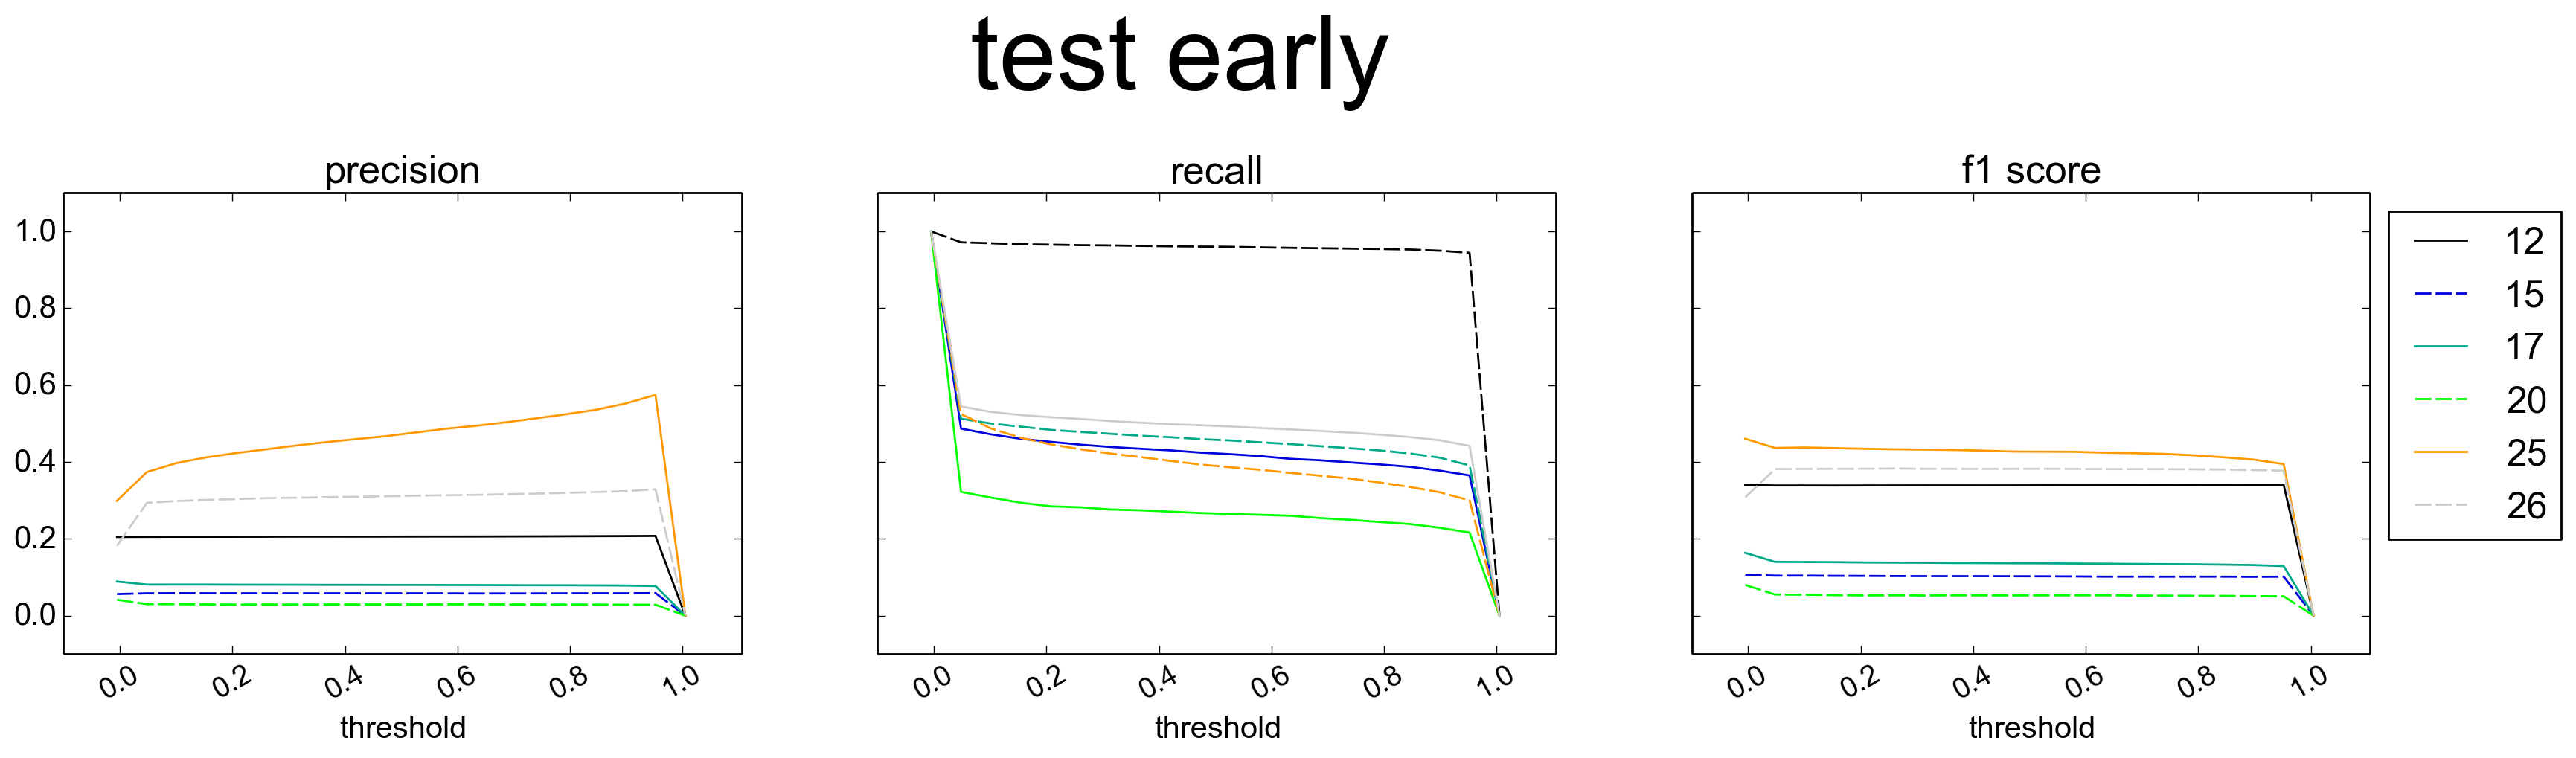

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
12 	0.59 	fail 	0.34 	0.21 	1.0
15 	0.51 	fail 	0.11 	0.06 	1.0
17 	0.45 	fail 	0.16 	0.09 	1.0
20 	0.41 	fail 	0.08 	0.04 	1.0
25 	0.58 	fail 	0.46 	0.57 	1.0
26 	0.65 	poor 	0.38 	0.33 	1.0
average roc =  0.5318465583
best thresholds
au	best roc	best f1		col3-col2
12 	1.0 		0.95 		-0.05
15 	1.0 		-0.01 		-1.01
17 	2.0 		-0.01 		-2.01
20 	2.0 		-0.01 		-2.01
25 	0.58 		-0.01 		-0.59
26 	0.25 		0.26 		0.01


In [5]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

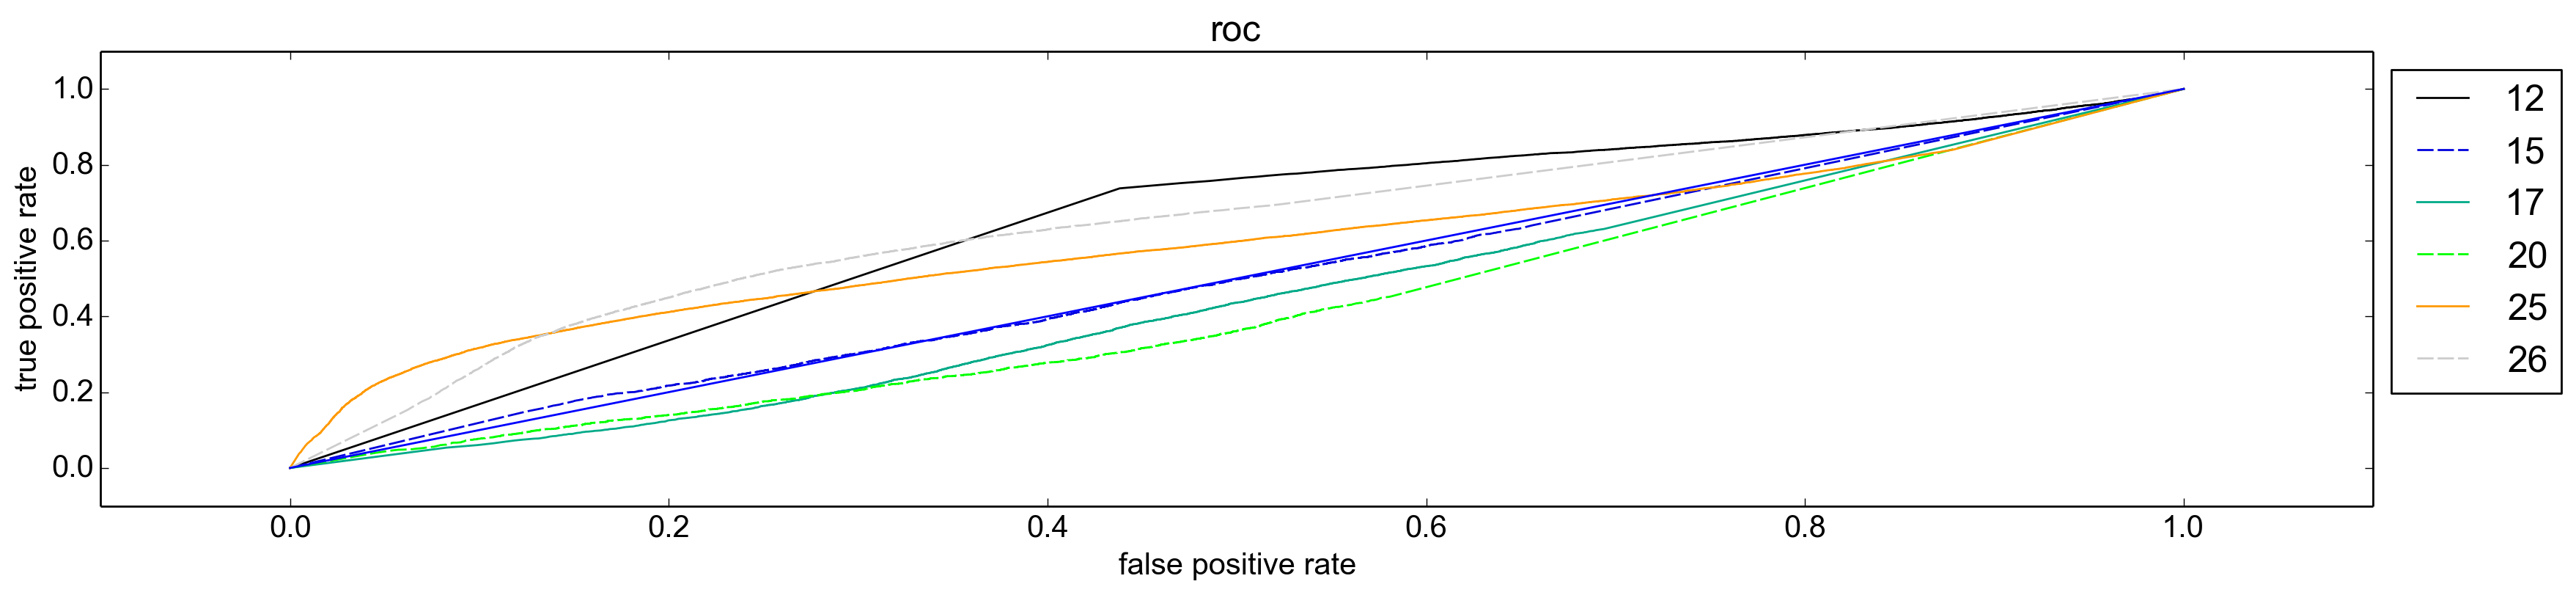

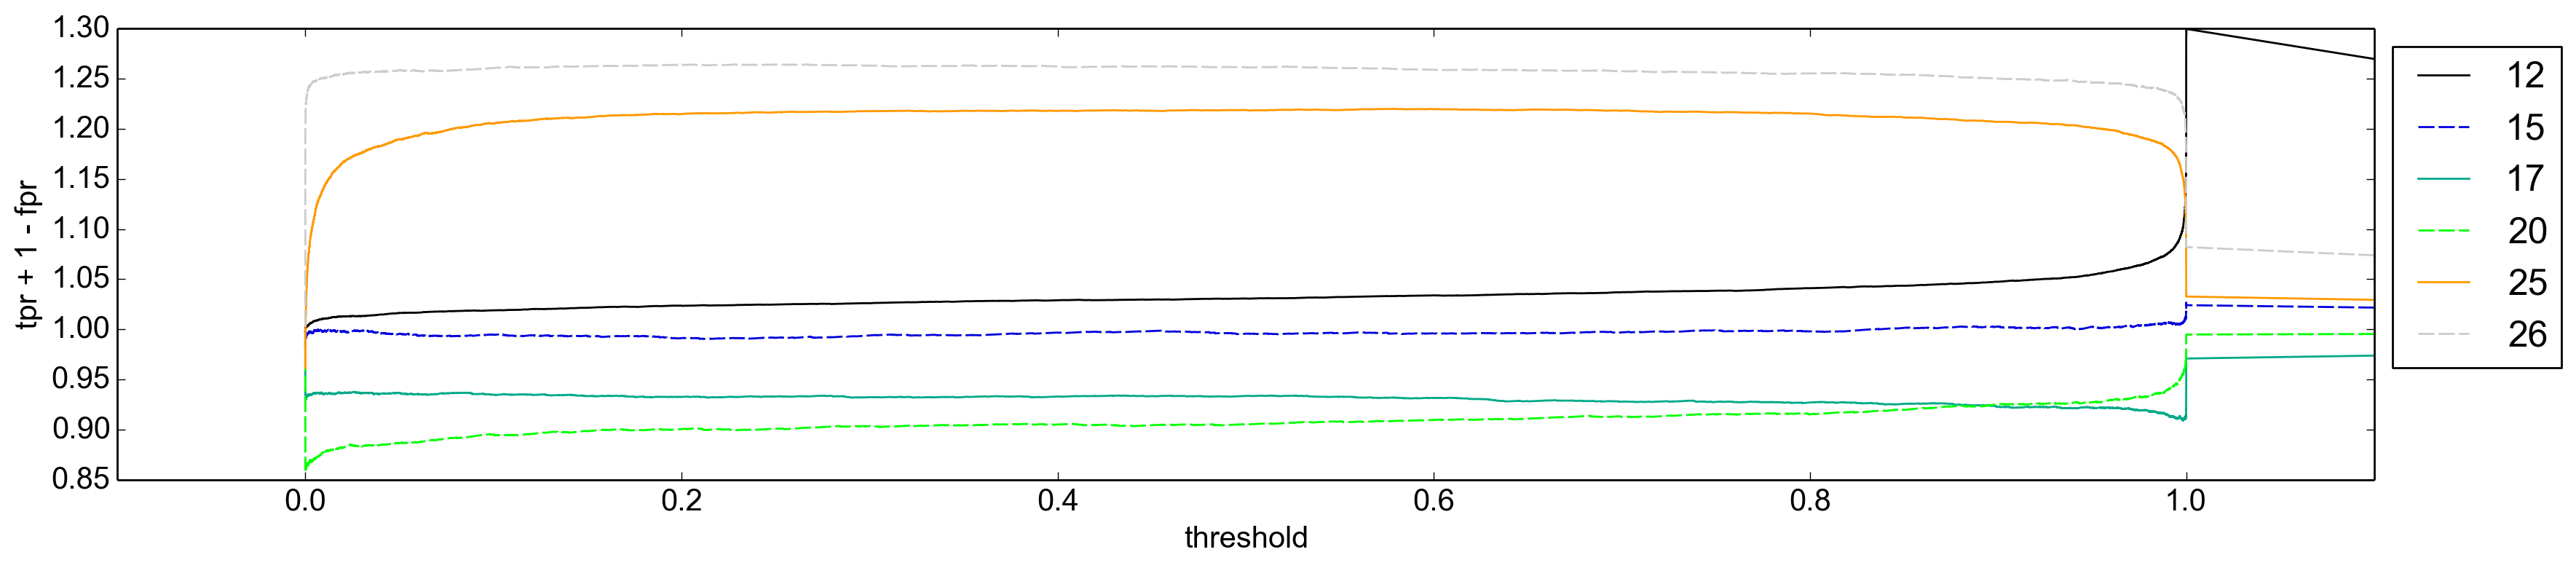

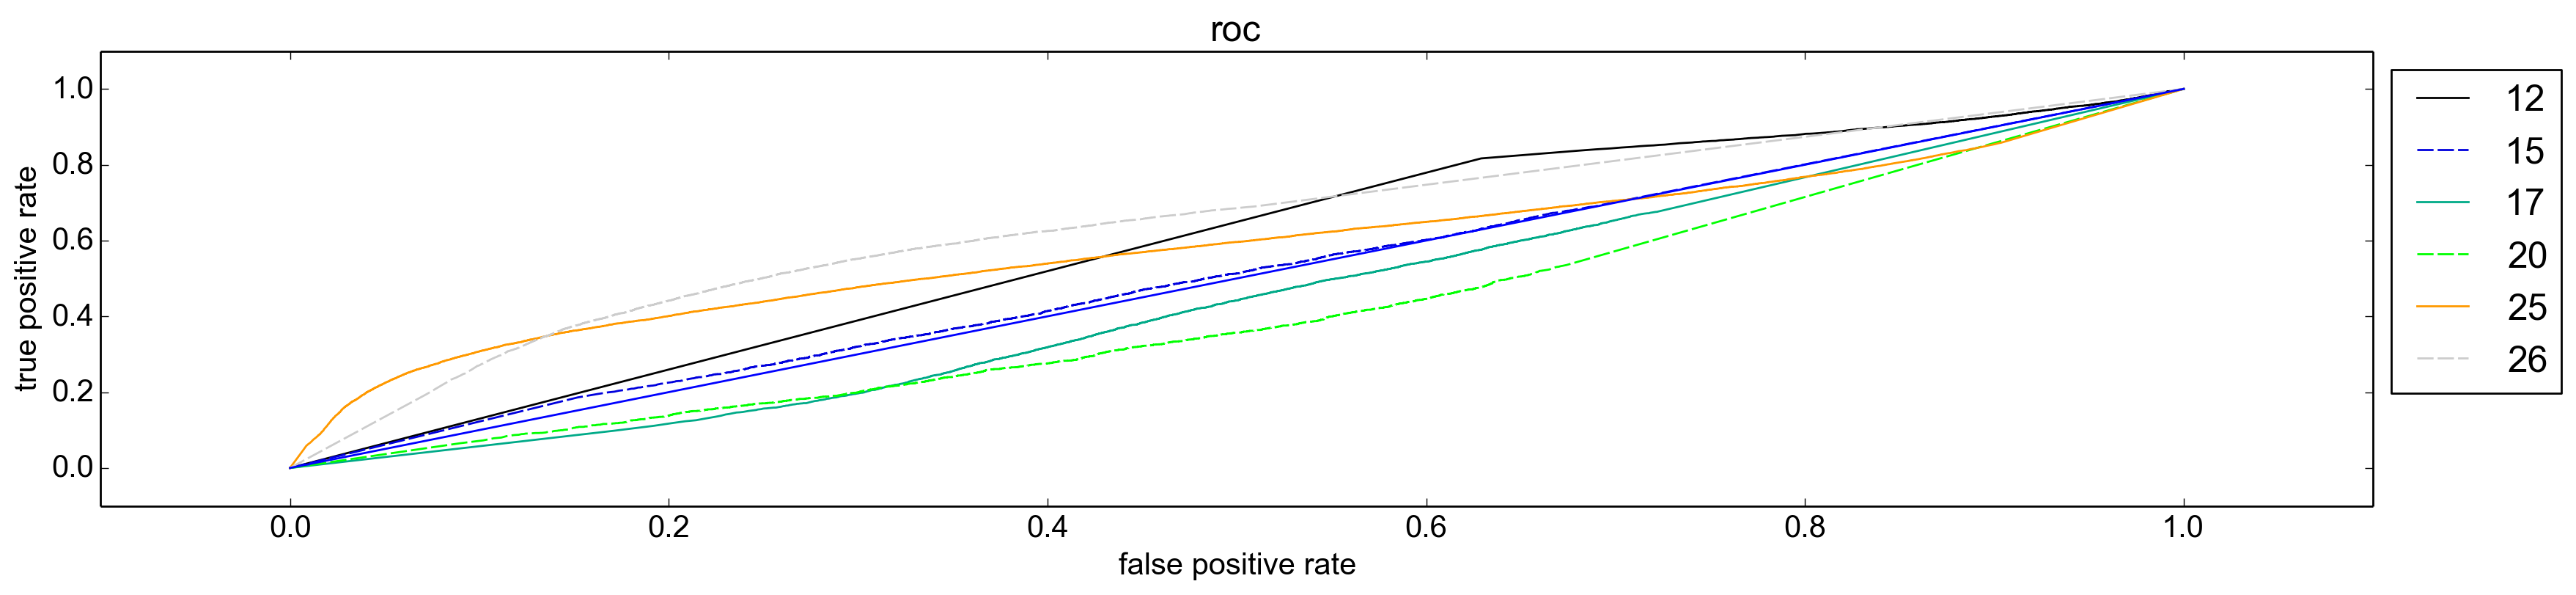

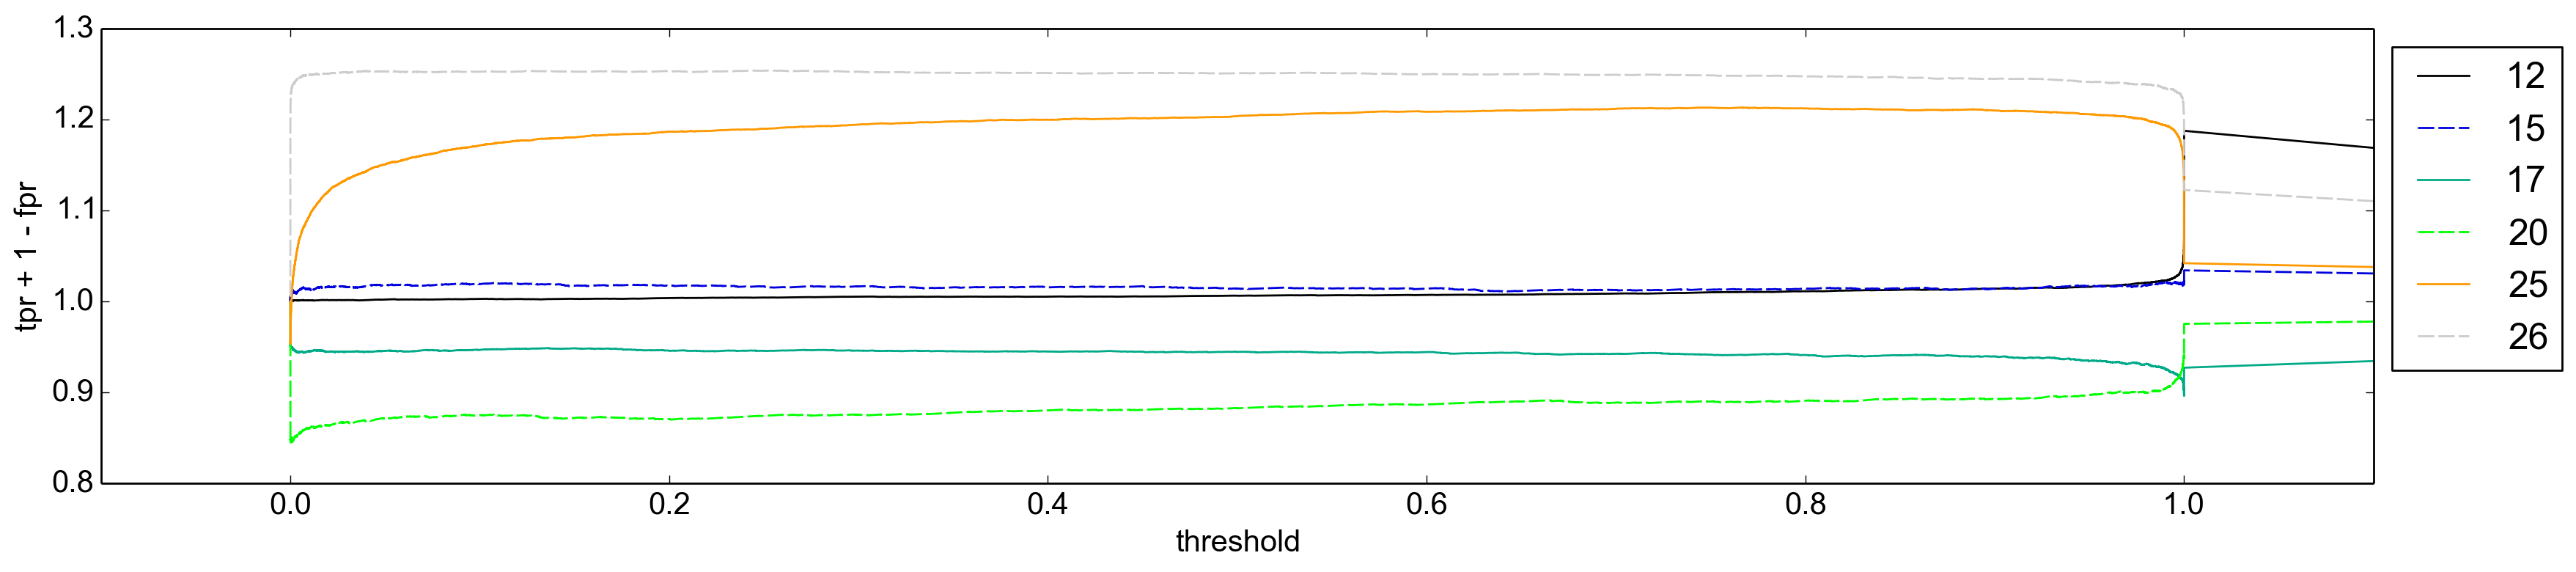

In [6]:
r.roc_plot('final')
r.roc_plot('early')

In [7]:
r.test_confusion('early')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.95
	[  13129 	 774 	]
	[  50049 	 3878 	]
	roc:	0.59
	f1:	0.34
	p:	0.21
	r:	0.94
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  15 threshold:  -0.01
	[  3832 	 0 	]
	[  63998 	 0 	]
	roc:	0.51
	f1:	0.11
	p:	0.06
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  17 threshold:  -0.01
	[  6044 	 0 	]
	[  61786 	 0 	]
	roc:	0.45
	f1:	0.16
	p:	0.09
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  20 threshold:  -0.01
	[  2832 	 0 	]
	[  64998 	 0 	]
	roc:	0.41
	f1:	0.08
	p:	0.04
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  25 threshold:  -0.01
	[  20290 	 0 	]
	[  47540 	 0 	]
	roc:	0.58
	f1:	0.46
	p:	0.3
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  26 threshold:  0.26
	[  6329 	 6028 	]
	[  14350 	 41123 	]
	roc:	0.65
	f1:	0.38
	p:	0.31
	r:	0.51


In [8]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.95
	[  12444 	 1459 	]
	[  45300 	 8627 	]
	roc:	0.64
	f1:	0.35
	p:	0.22
	r:	0.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  15 threshold:  -0.01
	[  3832 	 0 	]
	[  63998 	 0 	]
	roc:	0.5
	f1:	0.11
	p:	0.06
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  17 threshold:  -0.01
	[  6044 	 0 	]
	[  61786 	 0 	]
	roc:	0.45
	f1:	0.16
	p:	0.09
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  20 threshold:  -0.01
	[  2832 	 0 	]
	[  64998 	 0 	]
	roc:	0.43
	f1:	0.08
	p:	0.04
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  25 threshold:  -0.01
	[  20290 	 0 	]
	[  47540 	 0 	]
	roc:	0.59
	f1:	0.46
	p:	0.3
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  26 threshold:  0.26
	[  6430 	 5927 	]
	[  14232 	 41241 	]
	roc:	0.65
	f1:	0.39
	p:	0.31
	r:	0.52
